## Venta de coches 2ª mano, predicciones

https://www.kaggle.com/datasets/datamarket/venta-de-coches

# EDA

## 1. Cargar datos y libros

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
#import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-darkgrid')
sns.set(style="darkgrid", palette= "magma",font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [89]:
df = pd.read_csv("coches-de-segunda-mano-sample.csv")
#Entendiendo el dataset
df.head(3)

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00


## 2. Explorando datos

In [90]:
# que tamaño tienen los datos?
print('Cantidad de filas y columnas:',df.shape)


Cantidad de filas y columnas: (50000, 21)


In [91]:
# que columnas tienen los datos?
print('Nombre columnas:', df.columns)

Nombre columnas: Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')


In [92]:
# hay valores nulos en los datos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [93]:
# como se distribuyen las variables numéricas
#df.describe(include="all").T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,50000.0,15166.270260,16485.669747,300.0,5500.0,11750.0,19800.0,549900.0
price_financed,23563.0,18480.029283,13389.800738,700.0,10790.0,15500.0,21995.0,428999.0
year,49998.0,2012.311032,6.677760,1970.0,2007.0,2015.0,2018.0,2021.0
kms,50000.0,116359.094880,107292.148185,0.0,38300.0,99999.0,174900.0,5000000.0
power,41472.0,146.396388,71.283964,29.0,109.0,130.0,163.0,800.0
doors,50000.0,4.505380,0.868001,2.0,4.0,5.0,5.0,5.0
photos,50000.0,16.199120,12.422882,0.0,7.0,13.0,23.0,54.0


In [94]:
#suma total valores NaN
df.isna().sum().sum()

35731

In [95]:
#datos nulos
df.isnull().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64

In [96]:
# Cantidad de valores unicos
df.nunique()

url                50000
company                1
make                  75
model                940
version            17397
price               3343
price_financed      3352
fuel                   7
year                  51
kms                14142
power                347
doors                  4
shift                  2
color               3565
photos                55
is_professional        2
dealer             13006
province              52
country                1
publish_date       46507
insert_date            1
dtype: int64

## 3. Limpieza de datos

In [97]:
# me quedo con las columnas que me interesa
df_coches_def = df[['make','model','fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'province','price', 'publish_date' ]]
df_coches_def

,make,model,fuel,year,kms,power,doors,shift,color,province,price,publish_date
0,SEAT,Toledo,Diésel,2000.0,227000,NaN,4,Manual,Verde,Navarra,950,2020-12-18 10:47:13
1,CITROEN,C1,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,Tenerife,6200,2021-01-02 11:25:40
2,FORD,Transit Connect,Diésel,2016.0,103000,100.0,4,Manual,Blanco,Barcelona,7851,2020-12-16 10:51:45
3,VOLKSWAGEN,Caravelle,Diésel,2014.0,120000,140.0,4,Manual,Blanco,Navarra,19426,2020-11-25 11:09:14
4,FORD,Transit,Diésel,2017.0,107000,130.0,2,Manual,Blanco,Sevilla,22850,2021-01-12 20:00:34
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,HYUNDAI,i30,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,Málaga,18490,2020-11-24 19:59:52
49996,RENAULT,Laguna,Diésel,2015.0,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),Málaga,14500,2021-01-13 17:02:41
49997,PEUGEOT,108,Gasolina,2019.0,21422,72.0,5,Manual,Gris / Plata,Huelva,11000,2021-01-08 16:47:24
49998,AUDI,RS4,Gasolina,2013.0,47900,450.0,5,Automático,Gris / Plata (Antracita),Lugo,47900,2021-01-13 16:22:53


In [98]:
#elimino columnas descartadas
#df.drop (['url','company','price_financed','photos','is_professional','insert_date'], axis =1, inplace =True)


In [99]:
#compruebo que haya unknow o no
col_unknown = []
for i in df_coches_def.columns:
    if "unknown" in df_coches_def[i].values:
        col_unknown.append([i])

print(col_unknown)

[]


In [100]:
len(df_coches_def)

50000

In [101]:
# Elimino outliers (valores a tipicos)
Q1 = df_coches_def.quantile(0.25)
Q3 = df_coches_def.quantile(0.75)
IQR = Q3 - Q1

df_coches_def = df_coches_def[~((df_coches_def < (Q1 - 1.5 * IQR)) |(df_coches_def > (Q3 + 1.5 * IQR))).any(axis=1)]

In [102]:
len(df_coches_def)

43582

In [103]:
#elimino filas  NaN
df_coches_def = df_coches_def.dropna()
len


In [104]:

df_coches_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35635 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          35635 non-null  object 
 1   model         35635 non-null  object 
 2   fuel          35635 non-null  object 
 3   year          35635 non-null  float64
 4   kms           35635 non-null  int64  
 5   power         35635 non-null  float64
 6   doors         35635 non-null  int64  
 7   shift         35635 non-null  object 
 8   color         35635 non-null  object 
 9   province      35635 non-null  object 
 10  price         35635 non-null  int64  
 11  publish_date  35635 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 3.5+ MB


- Cambio tipo de dato en fechas para manipularlas

In [105]:
df_coches_def['publish_date']=df_coches_def['publish_date'].apply(lambda x :pd.to_datetime(x,errors='coerce',utc=True))

#lo utilizare más adelante


- Añado 2 nuevas columnas

In [106]:
df_coches_def['publish_year'] = pd.to_datetime(df_coches_def.publish_date, format="%d/%m/Y").dt.year
df_coches_def['publish_month'] = pd.to_datetime(df_coches_def.publish_date, format="%d/%m/Y").dt.month


- Elimino la columna 'publish_date', porque he extrage lo necesario

In [107]:
df_coches_def.drop(['publish_date'], axis = 1, inplace =True)

## 4. Relación de analisis

<AxesSubplot:>

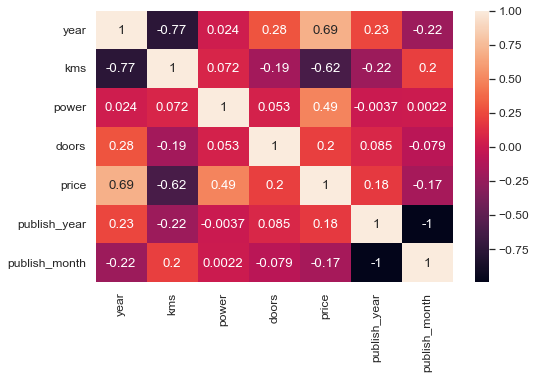

In [108]:
correlation = df_coches_def.corr(method='pearson')
#plt.figure(figsize=(8,6))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#plt.show()


<Figure size 1080x1080 with 0 Axes>

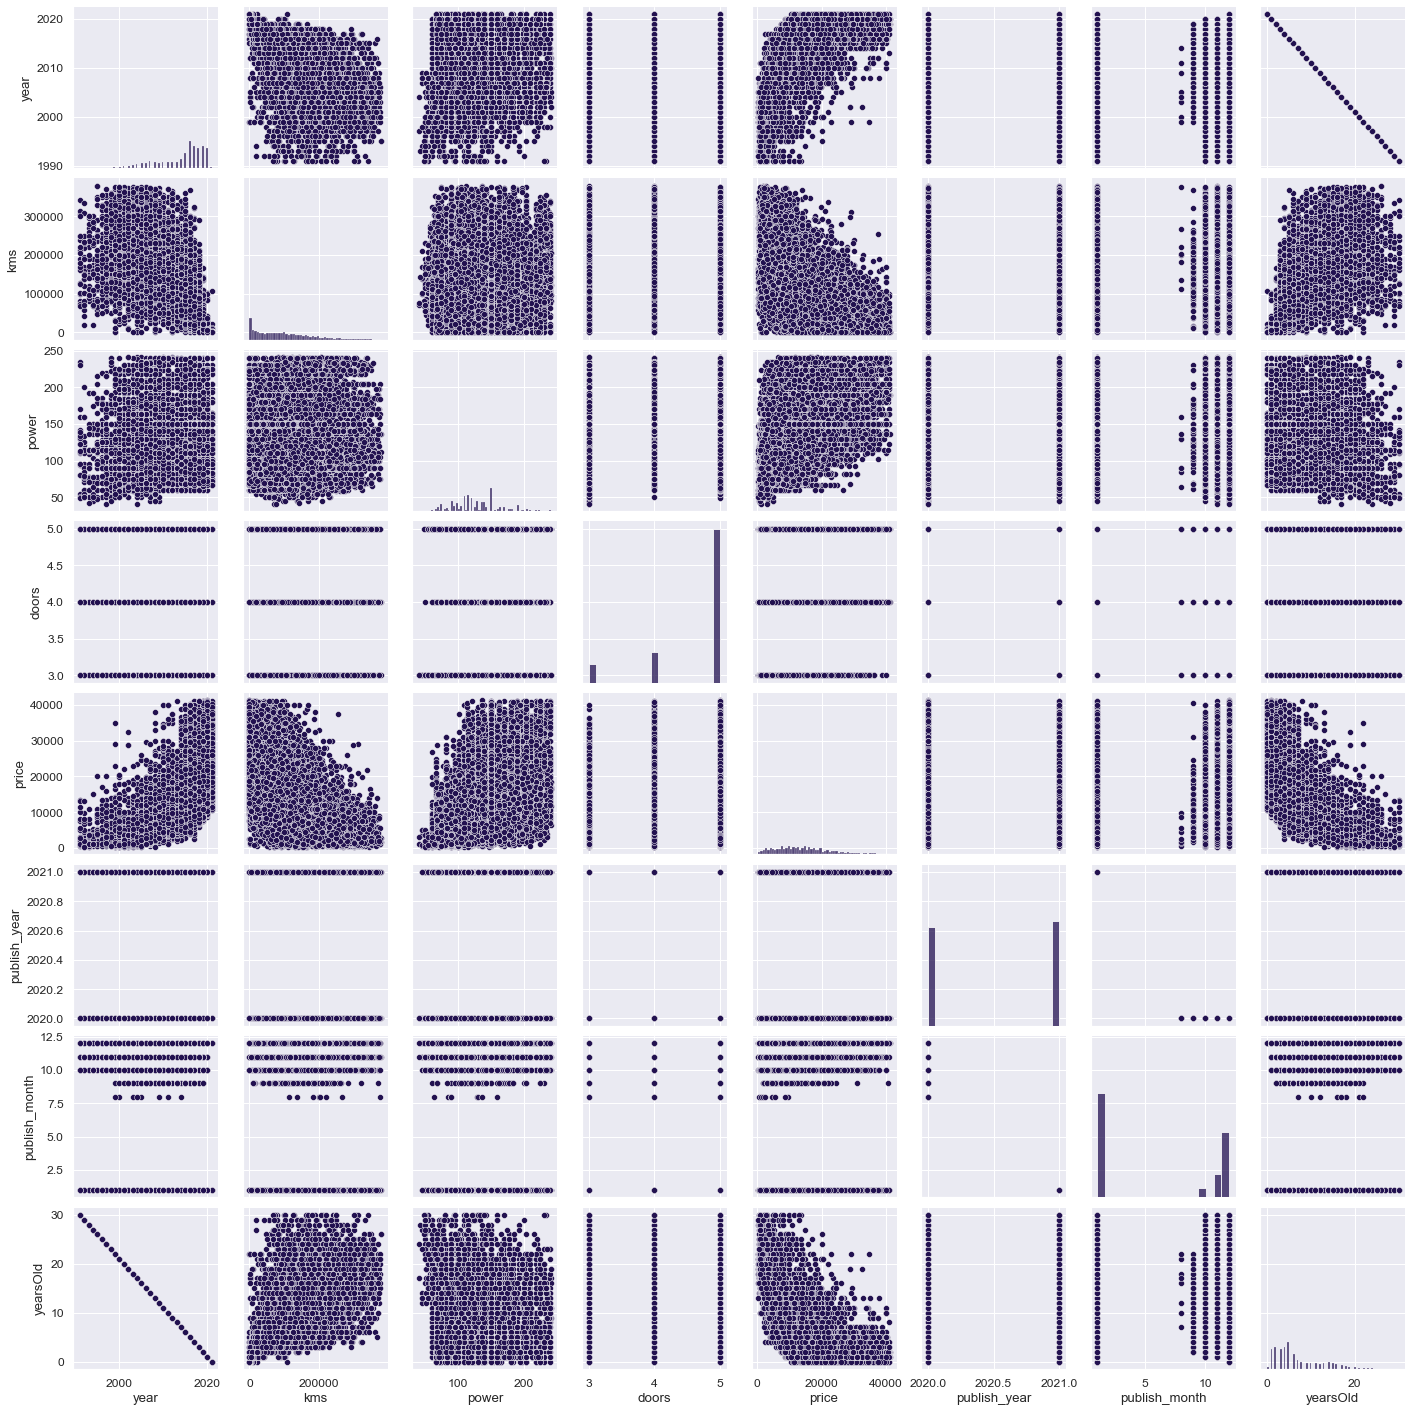

In [170]:
plt.figure(figsize=(15,15))
sns.pairplot(df_coches_def);

In [110]:
df_coches_def.head(3)

,make,model,fuel,year,kms,power,doors,shift,color,province,price,publish_year,publish_month
1,CITROEN,C1,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,Tenerife,6200,2021,1
2,FORD,Transit Connect,Diésel,2016.0,103000,100.0,4,Manual,Blanco,Barcelona,7851,2020,12
3,VOLKSWAGEN,Caravelle,Diésel,2014.0,120000,140.0,4,Manual,Blanco,Navarra,19426,2020,11


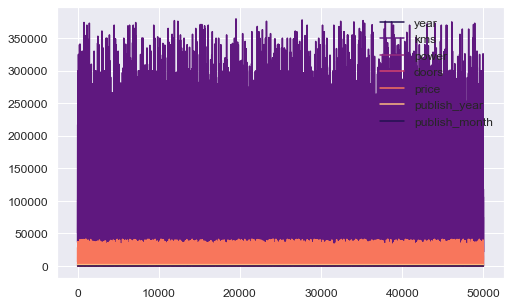

In [111]:
#vistazo rapido de la gráfica general 
df_coches_def.plot();

<AxesSubplot:>

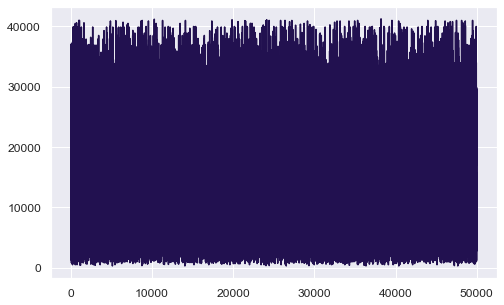

In [112]:
df_coches_def.price.plot()

## HIPÓTESIS 1
- Saber si vale la pena la inversión de comprar un coche de segunda mano 'Eléctrico' respecto a los más anunciados que son el Diesel y Gasolina. 

    RESPUESTA DESPUÉS DEL APARTADO 4.4 Y 4.5

## HIPÓTESIS 2
- En relación a la cantidad de anuncios que hay de coches si el mercado de coches de segunda mano va a subir.

RESPUESTA DESPUÉS DEL APARADO 4.6

# 4.1 Precio medio de venta por marca

In [113]:
#ANALISO VARIOS DATOS PARA TENER ENCUENTA LA HIPOTESIS

#agrupo la marcar y saco su precio medio y lo dejo en un  nuevo dataset
df_mp=df_coches_def.groupby(['make']).agg({'price':'mean'}).reset_index()

df_mp

,make,price
0,ABARTH,19276.402778
1,ALFA ROMEO,12971.009434
2,AUDI,17540.806989
3,BMW,17553.016347
4,CADILLAC,4500.000000
5,CHEVROLET,5486.062069
6,CHRYSLER,5039.079365
7,CITROEN,10804.372966
8,CUPRA,30866.666667
9,DACIA,8704.421053


- Bar Char de Precio medio de venta por marca

In [171]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

x = df_mp.make

trace1 = {
    'x': x,
    'y': df_mp['price'],
    'name': 'price',
    'type': 'bar'
}


data = [trace1]

layout  = {
    'xaxis': {'title': 'Marcas'},
    'barmode': 'group',
    'title': 'Precio medio de venta por marca'

}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

#observamos el mercado de venta de coches de segunda mano

## 4.2 Fecha media de fabricación por marca

In [115]:
df_year=df_coches_def.groupby(['make']).agg({'year':'mean'}).reset_index()
df_year

,make,year
0,ABARTH,2017.694444
1,ALFA ROMEO,2012.169811
2,AUDI,2013.288907
3,BMW,2013.337965
4,CADILLAC,2006.000000
5,CHEVROLET,2009.793103
6,CHRYSLER,2005.333333
7,CITROEN,2013.980108
8,CUPRA,2020.333333
9,DACIA,2015.611336


In [172]:

# import graph objects as "go"
import plotly.graph_objs as go

# create trace1 
trace1 = go.Bar(x = df_year.make,
                y = df_year.year,
                name = 'year',
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                line = dict(color='rgb(0,0,0)', width = 0.5)),
                text = df_year.year)

data = [trace1]

layout = {
  'xaxis': {'title': 'Marcas coche'},
  'yaxis': {'title': 'Fecha media'},
  'title': 'Fecha media de fabricación'
}

fig = go.Figure(data = data, layout = layout)

iplot(fig)

#no encontre como reducirle el numero de decimales a los años

# 4.3 Top 10 marcas y modelos en venta

In [117]:
df_top = df_coches_def.groupby(['make','model']).count()['price'].reset_index()
df_top = df_top.sort_values(by = ["price"], ascending= False)
df_top = df_top.head(10)

#renombro columna 'price'
df_top = df_top.rename(columns={'price':'cantidad'})
df_top

,make,model,cantidad
663,VOLKSWAGEN,Golf,1039
17,AUDI,A4,674
16,AUDI,A3,655
38,BMW,Serie 3,647
179,FORD,Focus,628
565,SEAT,Ibiza,588
428,NISSAN,QASHQAI,567
567,SEAT,León,567
537,RENAULT,Mégane,564
443,OPEL,Astra,561


In [173]:
trace1 = {
    'x': df_top.model,
    'y': df_top.cantidad,
    'name': 'cantidad',
    'type': 'bar',
    'text': df_top.make,
    'marker' : dict(color = 'rgba(255, 255, 128, 0.7)')

}

data = [trace1]

layout  = {
    'xaxis': {'title': 'Modelos que más se venden'},
    'yaxis': {'title': 'Unidades disponibles'},
    'barmode': 'group',
    'title': 'Top 10 de coches que más se venden segun marca y modelo'

}

fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 4.4 Coches electricos por provincia

In [119]:
#https://public.opendatasoft.com/explore/dataset/provincias-espanolas/table/?sort=provincia
#extraigo coordenadas de la pagina

In [120]:
df_pro = df_coches_def.groupby(['fuel','province']).count()['price'].loc['Eléctrico'].reset_index()
df_pro = df_pro.sort_values(by = ["price"], ascending= False)
df_pro = df_pro.head(10)

#renombro columna 'price'
df_pro = df_pro.rename(columns={'price':'n_electricos'})

#añado latitudes y longitudes
latitudes = [40.4950873744,41.7310008895,39.3702562375,43.2376797057,36.8138591651,
            38.0023681653,43.292357861,41.6203648019,37.4356699135,38.4786378049 ]
df_pro['lat'] = latitudes
longitudes = [-3.71704619215,1.98405401772,-0.800789615081,-2.85260007926,-4.72586195603,
            -1.48575629332,-5.99350932547,-1.06449678144,-5.68277303032,-0.5686990683]
df_pro['lon'] = longitudes

df_pro

,province,n_electricos,lat,lon
28,Madrid,132,40.495087,-3.717046
7,Barcelona,63,41.731001,1.984054
41,Valencia,27,39.370256,-0.800790
43,Vizcaya,18,43.237680,-2.852600
4,Asturias,13,36.813859,-4.725862
36,Sevilla,13,38.002368,-1.485756
30,Málaga,13,43.292358,-5.993509
45,Zaragoza,12,41.620365,-1.064497
33,Pontevedra,12,37.435670,-5.682773
29,Murcia,12,38.478638,-0.568699


In [121]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 28 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   province      10 non-null     object 
 1   n_electricos  10 non-null     int64  
 2   lat           10 non-null     float64
 3   lon           10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 400.0+ bytes


In [122]:
#cambio tipo de dato para que lo lea el mapa
df_pro['n_electricos'] = df_pro['n_electricos'].astype('object')

In [123]:
#creo nueva columna para pasar el dato en el mapa
df_pro["province_cantidad"] = df_pro['province']+ " = " + df_pro['n_electricos'].map(str)
#df_pro = df_pro.drop(["province_cantidad"],axis =1)
df_pro

,province,n_electricos,lat,lon,province_cantidad
28,Madrid,132,40.495087,-3.717046,Madrid = 132
7,Barcelona,63,41.731001,1.984054,Barcelona = 63
41,Valencia,27,39.370256,-0.800790,Valencia = 27
43,Vizcaya,18,43.237680,-2.852600,Vizcaya = 18
4,Asturias,13,36.813859,-4.725862,Asturias = 13
36,Sevilla,13,38.002368,-1.485756,Sevilla = 13
30,Málaga,13,43.292358,-5.993509,Málaga = 13
45,Zaragoza,12,41.620365,-1.064497,Zaragoza = 12
33,Pontevedra,12,37.435670,-5.682773,Pontevedra = 12
29,Murcia,12,38.478638,-0.568699,Murcia = 12


In [174]:
# Generamos la figura del mapa
fig = go.Figure()
 
# Recorremos los datos del archivo csv y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in df_pro:
    fig.add_trace(go.Scattergeo(
            lon = df_pro.lon,
            lat = df_pro.lat,
            text= df_pro.province_cantidad,
            
            
            marker = dict(
                size = 10,
                color = 'lightseagreen',
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Top 10 de provincias que venden coches electricos ',
    showlegend = False,
    geo = dict(
        scope='europe',
        resolution=50,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 

fig.show()

# Mostramos el mapa, no supe come escalarlo de manera que saliera como esta enfocado, y queria sacar el porcetante de coches electricos respecto del total 
# pero solo saque la suma total de las provincias como más ofertas.

## 4.5 Cantidad de coches según su combustible y kms

In [125]:
#valor único de combustibles
df_coches_def['fuel'].unique()

array(['Gasolina', 'Diésel', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)'], dtype=object)

- Combustible más habitual en los anuncios

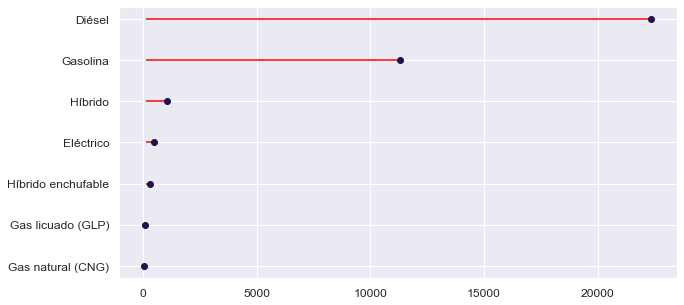

In [126]:
#para hacer una idea de la cantidad de los combustibles
conteo = df_coches_def['fuel'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='red')
plt.plot(conteo, conteo.index, "o");

In [127]:
df_coches_def.groupby(['shift','fuel']).count()['make'].reset_index()

,shift,fuel,make
0,Automático,Diésel,6240
1,Automático,Eléctrico,460
2,Automático,Gas natural (CNG),6
3,Automático,Gasolina,1996
4,Automático,Híbrido,894
5,Automático,Híbrido enchufable,297
6,Manual,Diésel,16124
7,Manual,Eléctrico,19
8,Manual,Gas licuado (GLP),76
9,Manual,Gas natural (CNG),50


In [128]:
df_fuel=df_coches_def.groupby(['shift','fuel']).agg({'price':'mean'}).reset_index()
df_fuel

,shift,fuel,price
0,Automático,Diésel,20365.409776
1,Automático,Eléctrico,23228.619565
2,Automático,Gas natural (CNG),20065.000000
3,Automático,Gasolina,19091.118737
4,Automático,Híbrido,19968.936242
5,Automático,Híbrido enchufable,29971.037037
6,Manual,Diésel,11681.288700
7,Manual,Eléctrico,23745.000000
8,Manual,Gas licuado (GLP),9916.526316
9,Manual,Gas natural (CNG),14208.000000


In [175]:
df_fuel = df_fuel.iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
    x = df_fuel["fuel"],
    y = df_fuel["price"],
    name = "price",
    mode = "markers",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    text = df_fuel["shift"]
)


data = [trace1] #lista
layout = dict(title = "Variación del precio medio según tipo de caja de cambio y combustible",
xaxis = dict(title="Tipo de combustible", ticklen = 5),
yaxis = dict(title="Precio medio", ticklen = 5))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

## CONCLUSIÓN Hipótesis 1  según apartados 4.4 y 4.5

- Saber si vale la pena la inversión de comprar un coche de segunda mano 'Eléctrico' respecto a los más anunciados que son el Diesel y Gasolina. 

    La respuesta sería FALLIDA porque no llegan ni al 1% de coches Electricos como para comparar con +30% de gasolina y +45% en diesel.
    Pero lo que se extrae de los analisis, es que el precio medio del motor electrico, esta en medio de los coches  automaticos que esta relacionado con gamas media-altas 
    de combustibles gasolina y diesel. Y conociendo que la gasolina sube cada día y quieren retirar coches con diesel. Seria una buena opción anunciar más  coches electricos,
    porque recargarlos es más barato y el precio es competitivo respecto los automaticos de diesel y gasolina


## 4.6 Comparo precio respecto los años de antiguedad

In [130]:
#creo nueva columna  años de antiguedad desde el 2021 ya es tomada el dataset desde ese año
df_old = df_coches_def
df_old['yearsOld']=2021-df_coches_def['year']
df_old

,make,model,fuel,year,kms,power,doors,shift,color,province,price,publish_year,publish_month,yearsOld
1,CITROEN,C1,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,Tenerife,6200,2021,1,4.0
2,FORD,Transit Connect,Diésel,2016.0,103000,100.0,4,Manual,Blanco,Barcelona,7851,2020,12,5.0
3,VOLKSWAGEN,Caravelle,Diésel,2014.0,120000,140.0,4,Manual,Blanco,Navarra,19426,2020,11,7.0
5,PEUGEOT,3008,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,Madrid,11490,2021,1,5.0
6,LAND-ROVER,Discovery Sport,Diésel,2017.0,36238,150.0,5,Automático,Blanco,Baleares,28500,2021,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,SEAT,León,Gasolina,2017.0,67900,180.0,5,Manual,Blanco,Barcelona,19490,2020,12,4.0
49994,SEAT,León,Diésel,2019.0,21153,115.0,5,Manual,Gris / Plata,Madrid,18590,2021,1,2.0
49995,HYUNDAI,i30,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,Málaga,18490,2020,11,3.0
49997,PEUGEOT,108,Gasolina,2019.0,21422,72.0,5,Manual,Gris / Plata,Huelva,11000,2021,1,2.0


In [176]:


import plotly.graph_objs as go



trace1 = go.Scatter(
    x = df_old.yearsOld,
    y = df_old.price,
    name = "price",
    mode = "markers",
    marker = dict(color = 'rgba(255, 17, 25, 0.8)'),
    text = df_old["make"]
)



data = [trace1] #lista
layout = dict(title = "Variación de precio con los años",
    xaxis = dict(title="Rango de años de antiguedad", ticklen = 5),
    yaxis = dict(title = "Precio en €", ticklen = 5, zeroline = False))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

In [132]:
df_pub=df_coches_def.groupby(['publish_year','publish_month']).agg({'price':'mean'}).reset_index()
df_pub

,publish_year,publish_month,price
0,2020,8,4342.500000
1,2020,9,10199.753086
2,2020,10,10348.111976
3,2020,11,10843.749202
4,2020,12,13631.174723
5,2021,1,15732.597577


In [133]:
df_coches_def.groupby(['publish_year','publish_month']).count()['make'].reset_index()


,publish_year,publish_month,make
0,2020,8,8
1,2020,9,81
2,2020,10,1670
3,2020,11,4071
4,2020,12,11481
5,2021,1,18324


## CONCLUSIÓN Hipótesis 2 según apartado 4.6

- En relación a la cantidad de anuncios que hay de coches si el mercado de coches de segunda mano va a subir.

    Es VERDADERA ya que  sube el precio medio ya que los datos son ascendente  segun los meses y el año 2020 y 2021, pero cabe destacar como dato anectotico, hay cada vez más 
    anuncios ofertados de coches, y puede dar a entender dos cosas, al haber teletrabajo a causa de la pandemia, la gente ya no usa tanto sus vehiculos que los vende, o va en transporte publico, por el encarecimiento de la vida como  consecuencia de esta.